In [1]:
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import learning_curve

data = pd.read_csv('data.csv')
X = np.array(data[['x1', 'x2']])
y = np.array(data['y'])

# Fix random seed
np.random.seed(55)

# Imports

# TODO: Uncomment one of the three classifiers, and hit "Test Run"
# to see the learning curve. Use these to answer the quiz below.

# Logistic Regression
estimator_1 = LogisticRegression()
# Decision Tree
estimator_2 = GradientBoostingClassifier()
# Support Vector Machine
estimator_3 = SVC(kernel='rbf', gamma=1000)

/home/toilethill/.local/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
# It is good to randomize the data before drawing Learning Curves
def randomize(X, Y):
    permutation = np.random.permutation(Y.shape[0])
    X2 = X[permutation,:]
    Y2 = Y[permutation]
    return X2, Y2



def draw_learning_curves(X, y, estimator, num_trainings):
    X2, y2 = randomize(X, y)
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X2, y2, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, num_trainings))

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.title("Learning Curves")
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    plt.plot(train_scores_mean, 'o-', color="g",
             label="Training score")
    plt.plot(test_scores_mean, 'o-', color="y",
             label="Cross-validation score")


    plt.legend(loc="best")

    plt.show()
    
num_trainings = 9

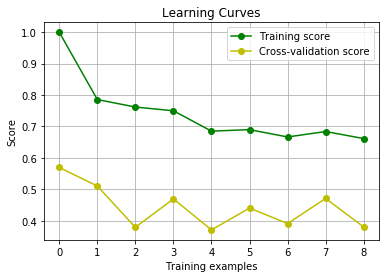

In [3]:
draw_learning_curves(X=X, y=y, estimator=estimator_1, num_trainings=num_trainings)

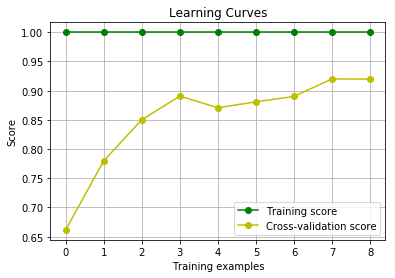

In [4]:
draw_learning_curves(X=X, y=y, estimator=estimator_2, num_trainings=num_trainings)


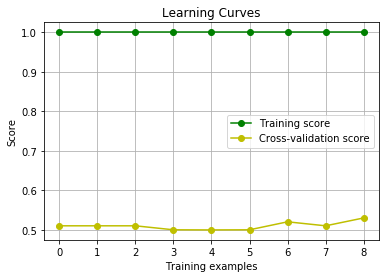

In [5]:
draw_learning_curves(X=X, y=y, estimator=estimator_3, num_trainings=num_trainings)